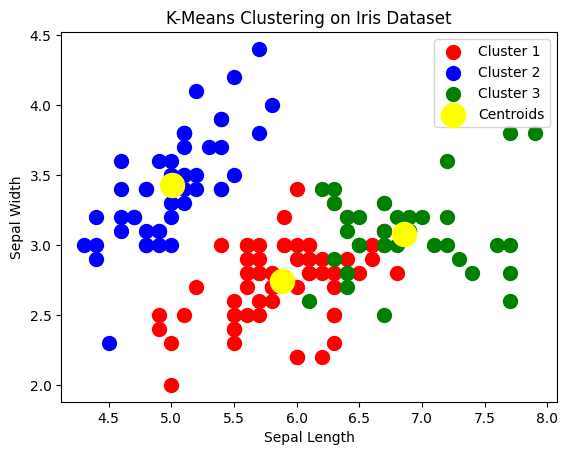

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data

# 使用KMeans进行聚类，设置聚类数为3
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# 可视化结果
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


In [4]:
# 导入必要的库
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 使用K均值算法进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# 将聚类结果映射到类别标签
def map_cluster_to_label(cluster_labels, true_labels):
    mapped_labels = cluster_labels.copy()
    for cluster_num in range(3):
        mask = (cluster_labels == cluster_num)
        mapped_labels[mask] = mode(true_labels[mask])[0]
    return mapped_labels

# 将训练集和测试集的聚类结果映射到真实标签
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)
train_mapped_labels = map_cluster_to_label(train_cluster_labels, y_train)
test_mapped_labels = map_cluster_to_label(test_cluster_labels, y_test)

# 计算准确率
train_accuracy = accuracy_score(y_train, train_mapped_labels)
test_accuracy = accuracy_score(y_test, test_mapped_labels)

# 打印输出准确率
print("训练集准确率:", train_accuracy)
print("测试集准确率:", test_accuracy)


训练集准确率: 0.8166666666666667
测试集准确率: 0.9333333333333333


In [50]:
import numpy as np
from sklearn.cluster import KMeans
import random
xy = np.loadtxt("test.csv", delimiter=",")
clusters = xy[[random.randint(0, 99999) for _ in range(4)], :-1]


model = KMeans(n_clusters=4, verbose=0, init=clusters)
model.fit(xy[:, :-1])
print(model.labels_[:10])


def map_cluster_to_label(cluster_labels, true_labels):
    mapped_labels = cluster_labels.copy()
    for cluster_num in range(4):
        mask = (cluster_labels == cluster_num)
        mapped_labels[mask] = mode(true_labels[mask])[0]
    return mapped_labels

y = model.predict(xy[:, :-1])

y = map_cluster_to_label(y, xy[:, -1])
accuracy = accuracy_score(y, xy[:, -1])

print(accuracy)

[3 0 2 1 1 3 3 1 1 3]
0.47


In [1]:
from fast_pytorch_kmeans import KMeans
import torch

kmeans = KMeans(n_clusters=4, mode='euclidean', verbose=1)
x = torch.randn(2359296, 1, device='cuda')
labels = kmeans.fit_predict(x)


used 9 iterations (0.1119s) to cluster 2359296 items into 4 clusters


In [2]:
from fast_pytorch_kmeans import KMeans
import torch

kmeans = KMeans(n_clusters=8, mode='euclidean', verbose=1)
x = torch.randn(100000, 64, device='cuda')
labels = kmeans.fit_predict(x)

used 100 iterations (0.1156s) to cluster 100000 items into 8 clusters


In [4]:
labels.shape

torch.Size([100000])